### Question 3

In [132]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [133]:
from google.colab import files
uploaded = files.upload()


Saving ElectrofaciesVolve.csv to ElectrofaciesVolve (3).csv


In [134]:
data = pd.read_csv("ElectrofaciesVolve.csv")
data.head()

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
0,1,2922.5,13.4058,8.7053,NaN,77.1874,4.5008,4.3012,71.0,23.583,...,2200.9165,1.4182,8.5,1.6100,2.4838,0.1439,NaN,NaN,NaN,0
1,1,2923.0,15.2468,6.4380,NaN,75.5047,6.5108,4.9543,71.0,33.721,...,1993.9286,1.4188,8.5,1.6648,2.4837,0.1503,NaN,NaN,NaN,0
2,1,2923.5,11.2243,6.2109,NaN,75.5697,7.6733,7.0439,71.0,34.831,...,1993.9286,1.4195,8.5,1.6856,2.4823,0.1434,NaN,NaN,NaN,0
3,1,2924.0,11.7085,5.9728,NaN,75.9891,10.2010,7.0977,72.0,35.166,...,1993.9286,1.4204,8.5,1.4633,2.4479,0.1458,NaN,NaN,NaN,0
4,1,2924.5,16.3429,6.1139,NaN,75.1929,12.8272,9.6089,72.0,34.892,...,1993.9286,1.4206,8.5,1.5418,2.4836,0.1638,NaN,NaN,NaN,0


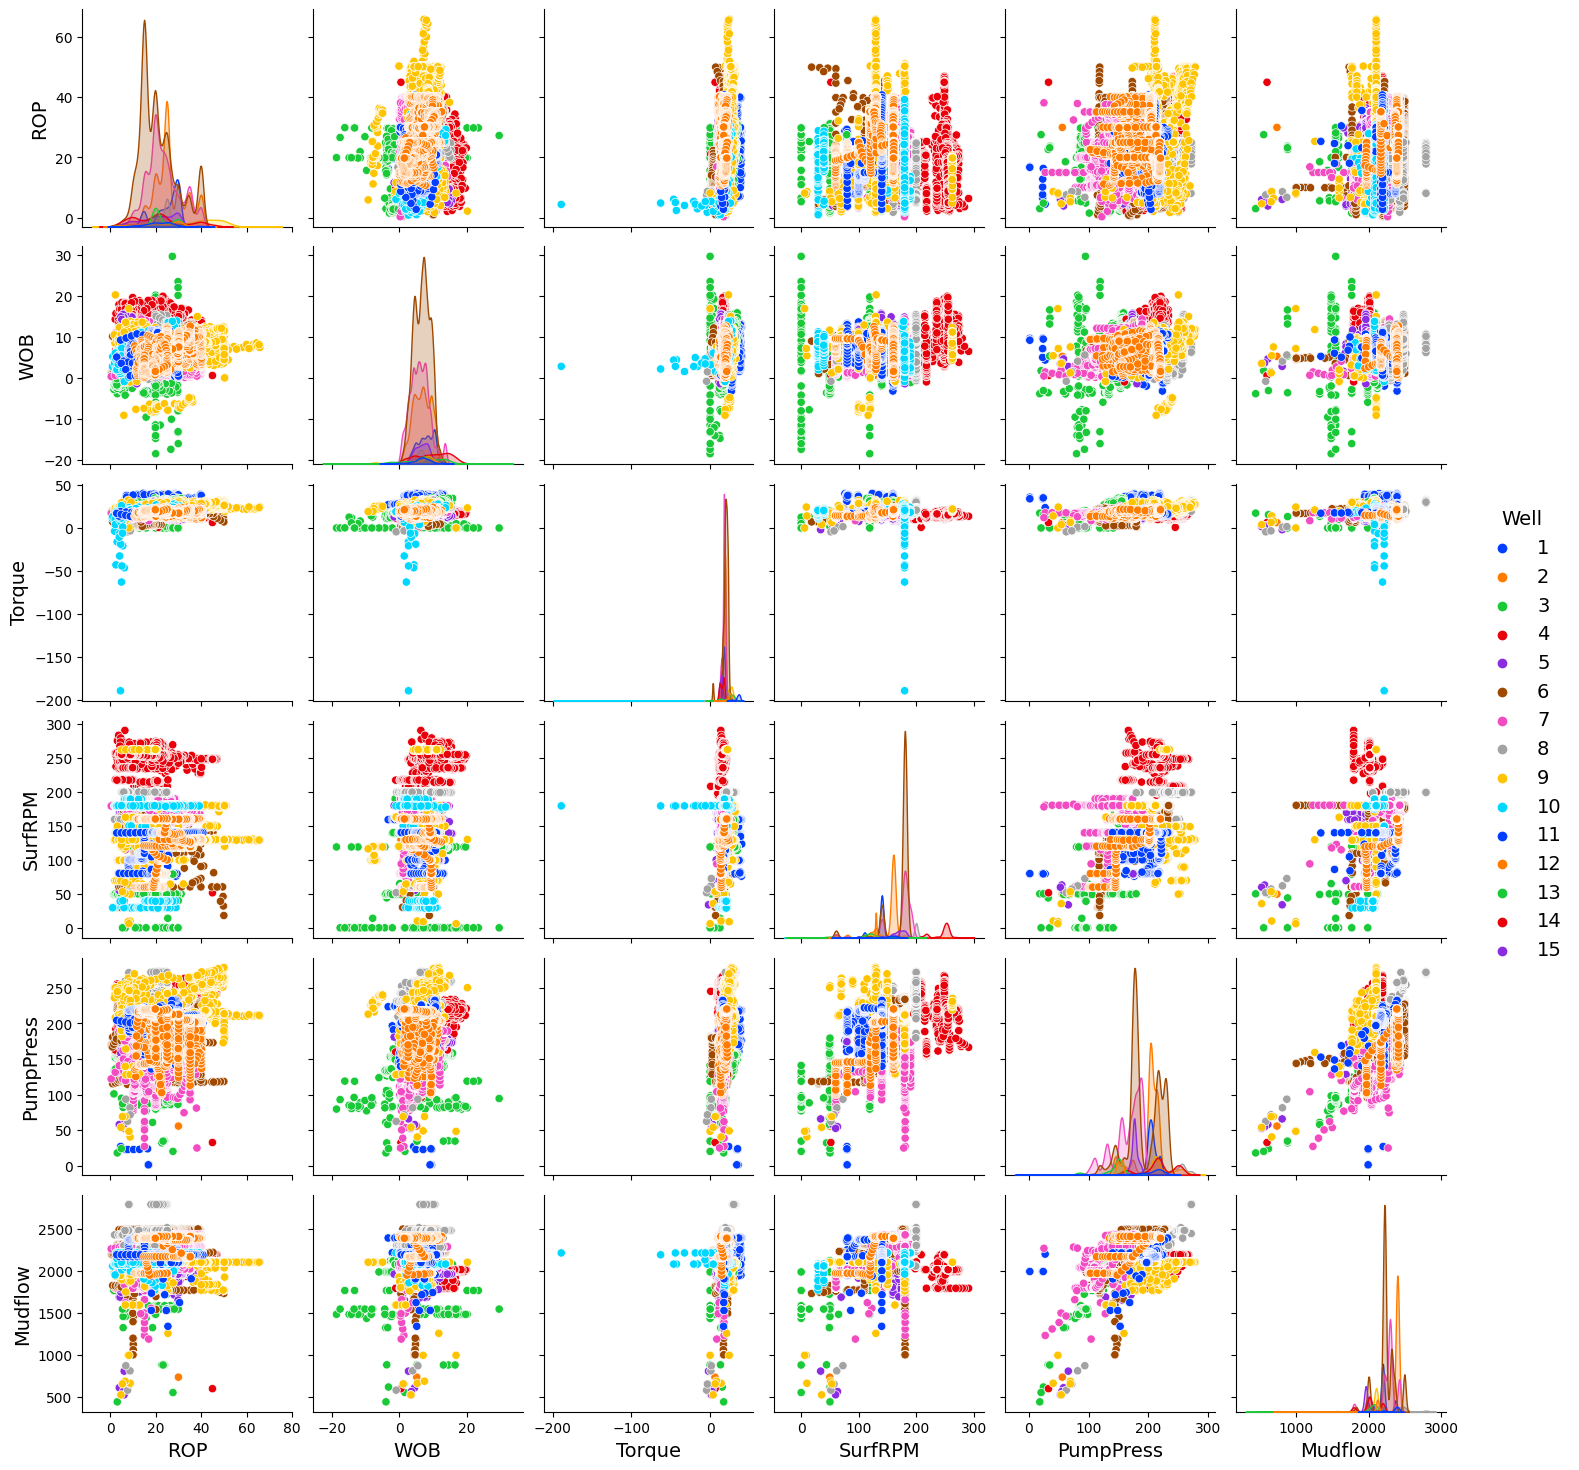

In [135]:
# Create a matrix scatterplot
#import seaborn as sns 
sns.pairplot(data, y_vars=['ROP', 'WOB', 'Torque','SurfRPM', 'PumpPress', 'Mudflow'], x_vars=['ROP', 'WOB', 'Torque','SurfRPM', 'PumpPress', 'Mudflow'], hue = 'Well', palette = "bright")


In [136]:
selected_wells = data[data['Well'] < 13].copy()

In [137]:
selected_wells.isna().sum()

Well             0
Depth            0
GR               0
PEF1         11346
PEF2          3251
DT               0
ROP              0
WOB              0
DownT            0
Torque           0
SurfRPM          0
PumpPress      533
DownP            0
Mudflow          0
ECD              0
BS               0
RT               0
RHOB             0
NPHI             0
Vquartz      50650
Vsh          50650
Vcarb        50650
Facies           0
dtype: int64

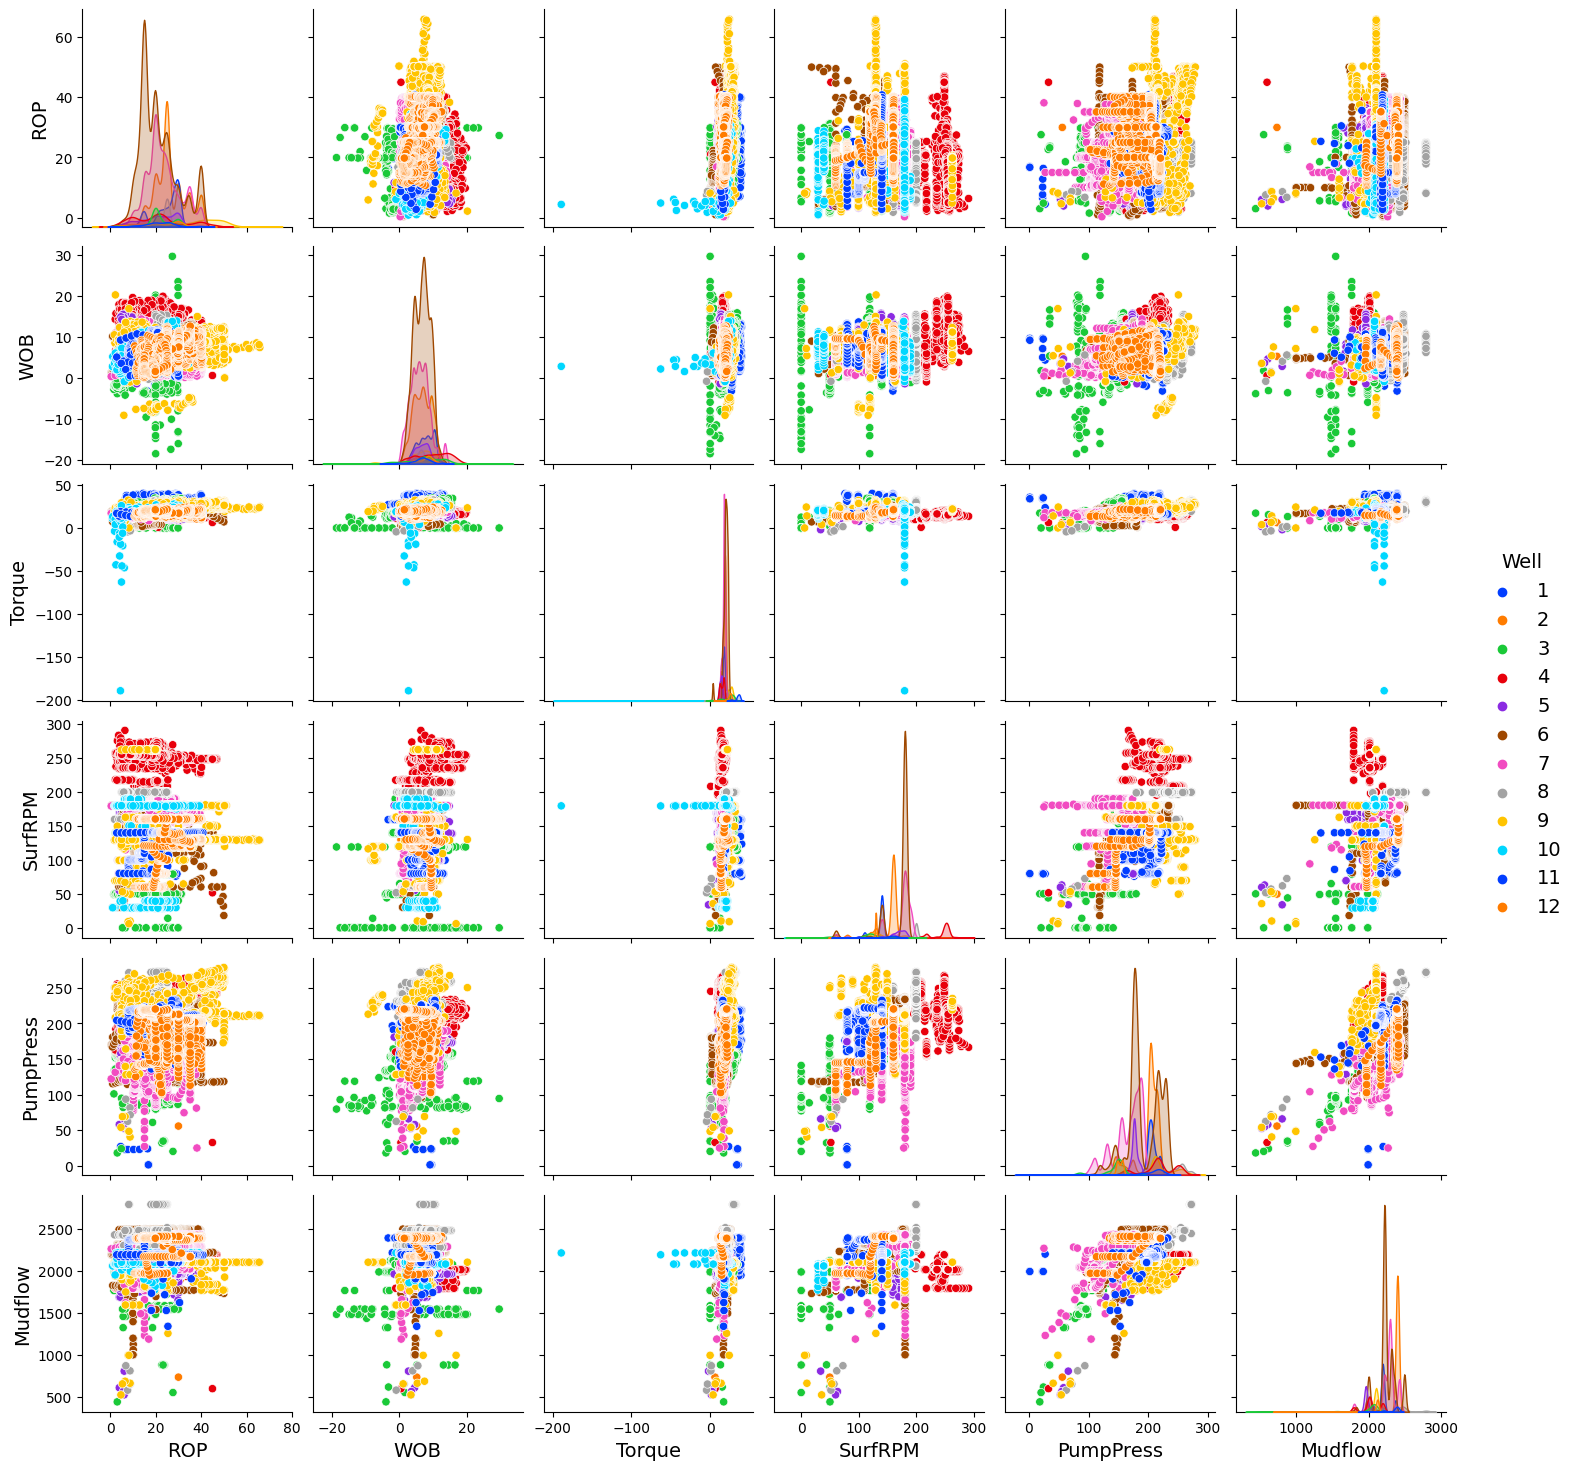

In [138]:
# Create a matrix scatterplot
#import seaborn as sns 
sns.pairplot(selected_wells, y_vars=['ROP', 'WOB', 'Torque','SurfRPM', 'PumpPress', 'Mudflow'], x_vars=['ROP', 'WOB', 'Torque','SurfRPM', 'PumpPress', 'Mudflow'], hue = 'Well', palette = "bright")


<Axes: xlabel='Well', ylabel='ROP'>

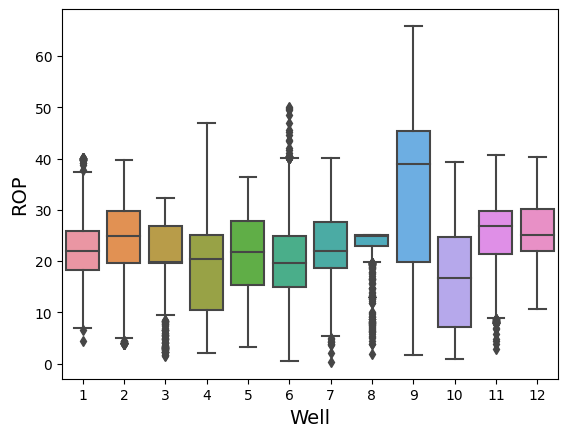

In [139]:
sns.boxplot(x=selected_wells['Well'], y=selected_wells['ROP'])

<Axes: xlabel='Well', ylabel='WOB'>

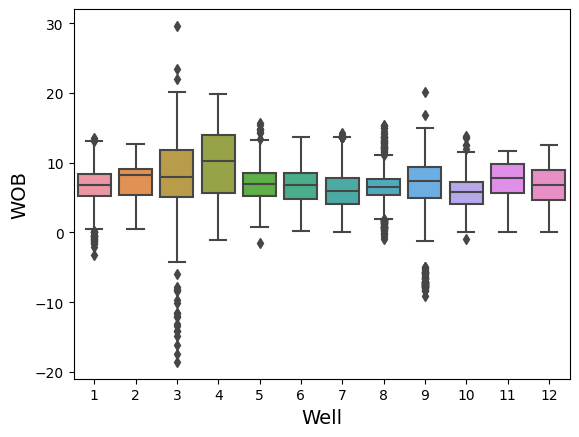

In [140]:
sns.boxplot(x=selected_wells['Well'], y=selected_wells['WOB'])

There appears to be a few negative WOB values in several wells. 

<Axes: xlabel='Well', ylabel='DownP'>

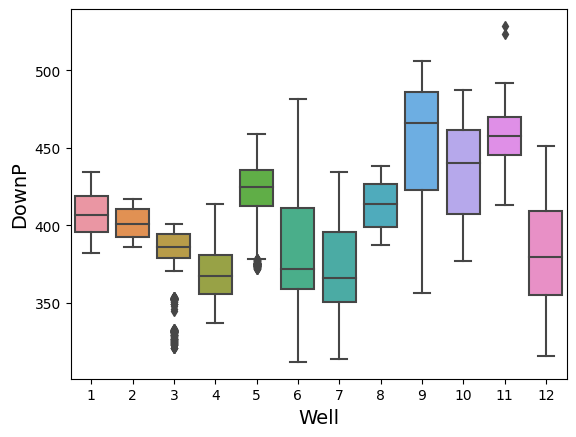

In [141]:
sns.boxplot(x=selected_wells['Well'], y=selected_wells['DownP'])

<Axes: xlabel='Well', ylabel='Torque'>

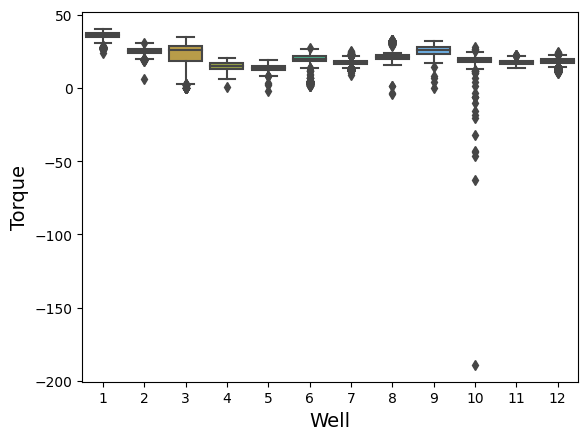

In [142]:
sns.boxplot(x=selected_wells['Well'], y=selected_wells['Torque'])

A few torque values are negative, they will be removed from the dataset because they contain no information related to the subsurface.

<Axes: xlabel='Well', ylabel='ECD'>

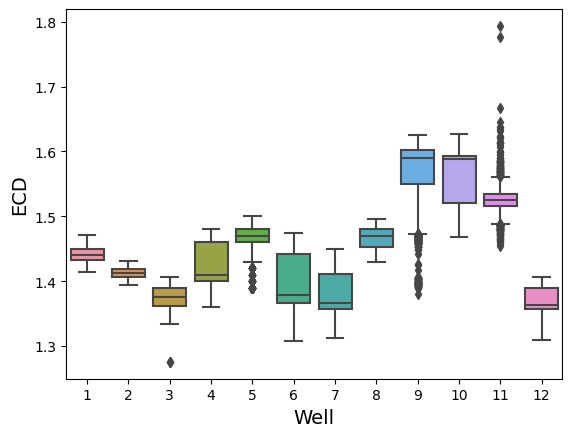

In [143]:
sns.boxplot(x=selected_wells['Well'], y=selected_wells['ECD'])

<Axes: xlabel='Well', ylabel='Mudflow'>

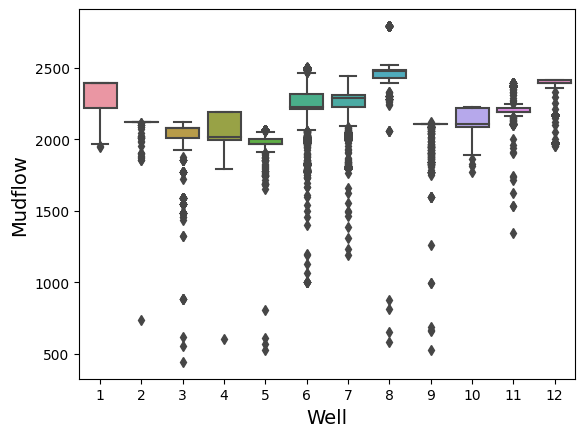

In [144]:
sns.boxplot(x=selected_wells['Well'], y=selected_wells['Mudflow'])

<Axes: xlabel='Well', ylabel='SurfRPM'>

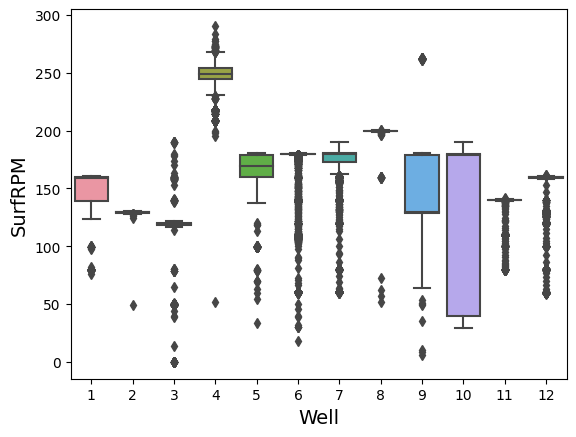

In [145]:
sns.boxplot(x=selected_wells['Well'], y=selected_wells['SurfRPM'])

### Outlier Treatment and handling

Remove outliers from the drilling data. The surface drilling data includes ROP, WOB, Torque, Surface RPM, Downhole Pressure, Mudflow and Equivalent Circulating Density.

In [146]:
Well1to12 = selected_wells [(selected_wells['WOB'] > 0) &
                                                     (selected_wells['Torque'] > 0) &
                                                     (selected_wells['SurfRPM'] > 0) &
                                                     (selected_wells['ECD'] > 0) &
                                                     (selected_wells['ROP'] > 0)].copy()

In [147]:
Well1to12.describe()

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
count,50373.000000,50373.000000,50373.000000,39027.000000,47216.000000,50373.000000,50373.000000,50373.000000,50373.000000,50373.000000,...,50373.000000,50373.000000,50373.0,50373.000000,50373.000000,50373.000000,0.0,0.0,0.0,50373.000000
mean,7.402994,3337.262650,33.578896,7.249607,6.966321,76.133027,23.053313,6.812085,85.616249,18.777943,...,2236.726419,1.408334,8.5,40.114052,2.483648,0.156562,NaN,NaN,NaN,0.414528
std,2.652717,507.199702,33.346616,1.345219,1.528488,13.428642,8.497632,2.844200,11.554943,3.983256,...,160.213858,0.060427,0.0,1181.210230,0.138491,0.085517,NaN,NaN,NaN,0.656308
min,1.000000,2552.000000,0.837900,3.168200,2.033600,48.937100,0.337400,0.018500,51.620500,0.013000,...,526.254300,1.308000,8.5,0.110900,1.875900,0.002000,NaN,NaN,NaN,0.000000
25%,6.000000,2969.200000,9.651400,6.243700,5.799150,66.500000,16.617600,4.685300,78.000000,16.906000,...,2192.850100,1.363900,8.5,1.737400,2.438000,0.092200,NaN,NaN,NaN,0.000000
50%,7.000000,3257.500000,24.713400,7.703100,7.438000,72.287000,22.371300,6.796600,86.352400,18.606000,...,2225.843300,1.390000,8.5,2.885000,2.530000,0.137800,NaN,NaN,NaN,0.000000
75%,9.000000,3576.800000,45.503600,8.327100,8.209000,84.032900,28.118300,8.702300,93.572000,20.496000,...,2365.823000,1.445700,8.5,5.357000,2.581000,0.201500,NaN,NaN,NaN,1.000000
max,12.000000,5301.500000,199.981700,22.042800,14.320300,136.253000,65.861000,20.217500,113.000000,40.169000,...,2791.500000,1.793500,8.5,62290.769500,3.039200,0.723200,NaN,NaN,NaN,2.000000


<Axes: xlabel='Well', ylabel='Torque'>

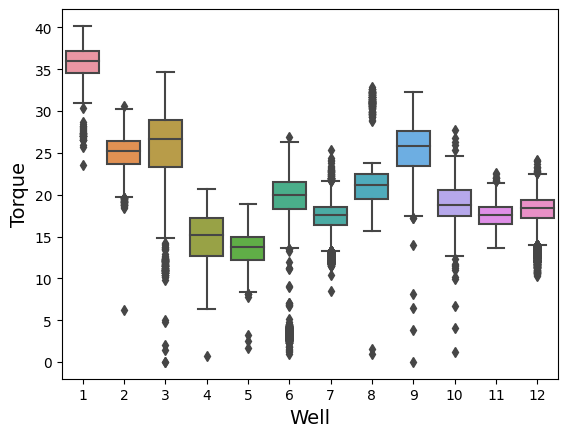

In [148]:
sns.boxplot(x=Well1to12['Well'], y=Well1to12['Torque'])

Well 4 does not have an unusually high Torque or WOB values, but its RPM values are definitely high. Well 1 however has very high torque values.

This necessitates a closer look at the data on a Well by Well basis. Let us look at Well 4, Well 1 and all other Wells separately.

In [149]:
labelled_data_Well4 = Well1to12[Well1to12['Well'] == 4].copy()
labelled_data_Well1 = Well1to12[Well1to12['Well'] == 1].copy()
labelled_data_notWell1and4 = Well1to12[(Well1to12['Well'] != 1) & (Well1to12['Well'] != 4)].copy()

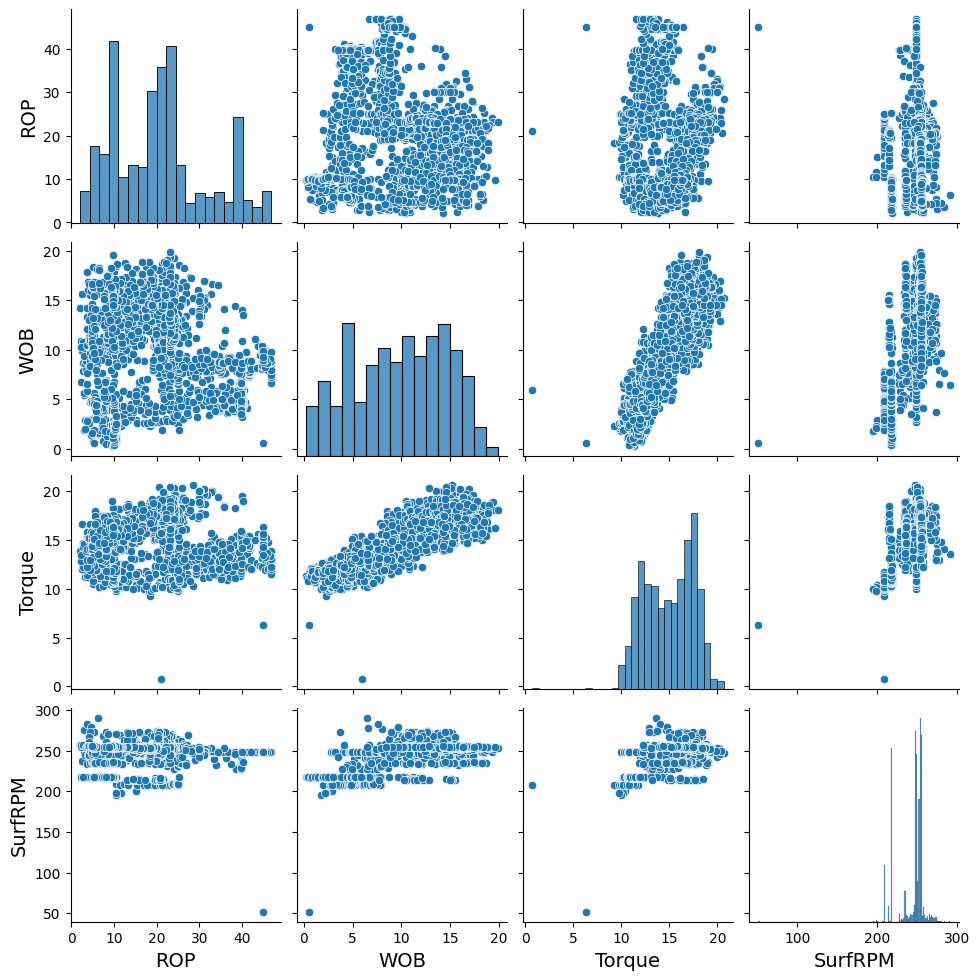

In [150]:
sns.pairplot(labelled_data_Well4, vars = ['ROP','WOB','Torque','SurfRPM'], palette = "bright")

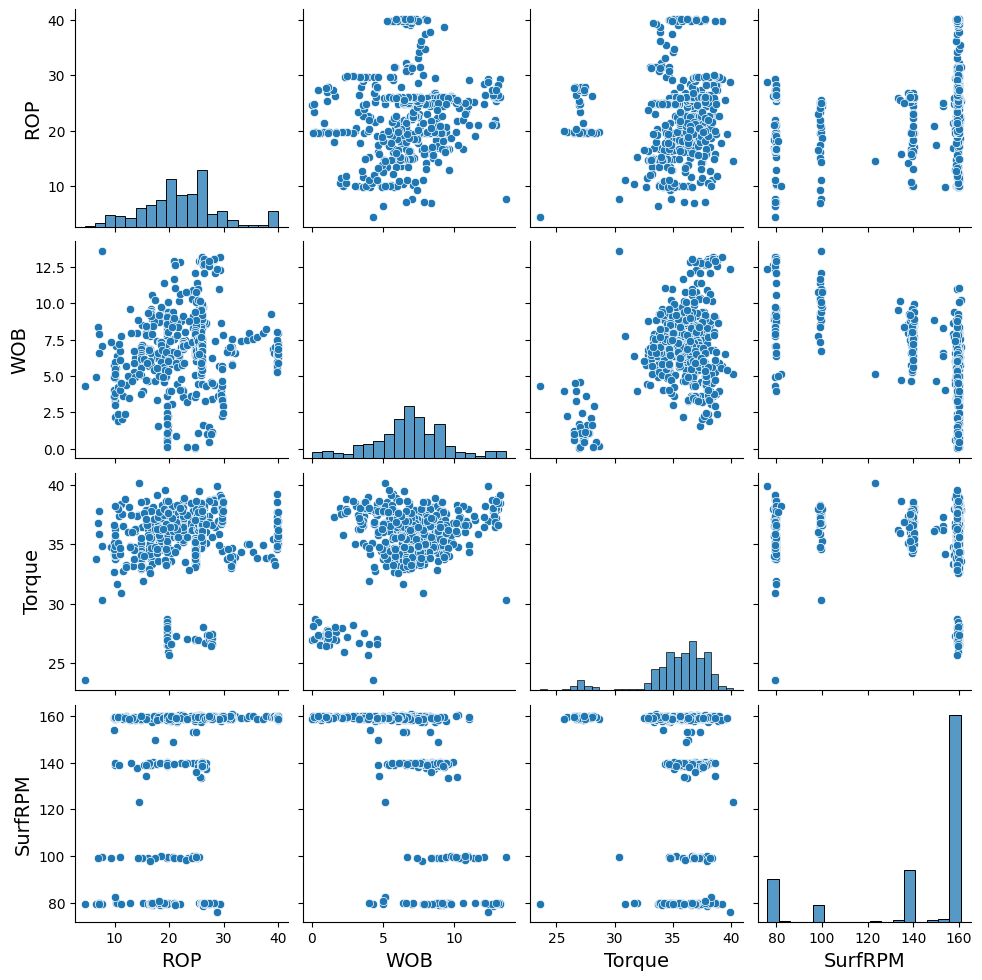

In [151]:
sns.pairplot(labelled_data_Well1, vars = ['ROP','WOB','Torque','SurfRPM'])

In [152]:
labelled_data_notWell1and4.describe()

,Well,Depth,GR,PEF1,PEF2,DT,ROP,WOB,DownT,Torque,...,Mudflow,ECD,BS,RT,RHOB,NPHI,Vquartz,Vsh,Vcarb,Facies
count,47727.000000,47727.000000,47727.000000,36381.000000,45085.000000,47727.000000,47727.000000,47727.000000,47727.000000,47727.000000,...,47727.000000,47727.000000,47727.0,47727.000000,47727.000000,47727.000000,0.0,0.0,0.0,47727.00000
mean,7.624028,3351.310054,33.777415,7.310912,7.076356,76.070958,23.162196,6.676091,85.755135,18.768195,...,2245.066152,1.407325,8.5,41.344302,2.484909,0.156033,NaN,NaN,NaN,0.41421
std,2.533518,513.226899,33.814957,1.319775,1.446873,13.184858,8.364311,2.648462,11.709187,3.569227,...,155.101304,0.061505,0.0,1211.992519,0.137137,0.084520,NaN,NaN,NaN,0.66081
min,2.000000,2577.000000,0.837900,3.375500,2.228100,48.937100,0.337400,0.024800,51.620500,0.013000,...,526.254300,1.308000,8.5,0.110900,1.875900,0.002000,NaN,NaN,NaN,0.00000
25%,6.000000,2977.200000,9.501150,6.365100,6.010000,66.671400,16.827000,4.655200,78.030700,17.056000,...,2196.353850,1.363400,8.5,1.758000,2.443100,0.093000,NaN,NaN,NaN,0.00000
50%,7.000000,3270.100000,24.828200,7.797600,7.539000,72.300000,22.497900,6.724100,86.441900,18.698000,...,2227.302700,1.384200,8.5,2.892500,2.530000,0.138000,NaN,NaN,NaN,0.00000
75%,9.000000,3592.800000,45.655800,8.351300,8.241000,83.814000,28.250400,8.548100,94.343900,20.533000,...,2367.359900,1.444950,8.5,5.339000,2.580000,0.199600,NaN,NaN,NaN,1.00000
max,12.000000,5301.500000,199.981700,22.042800,14.320300,136.253000,65.861000,20.217500,113.000000,34.667000,...,2791.500000,1.793500,8.5,62290.769500,3.039200,0.723200,NaN,NaN,NaN,2.00000


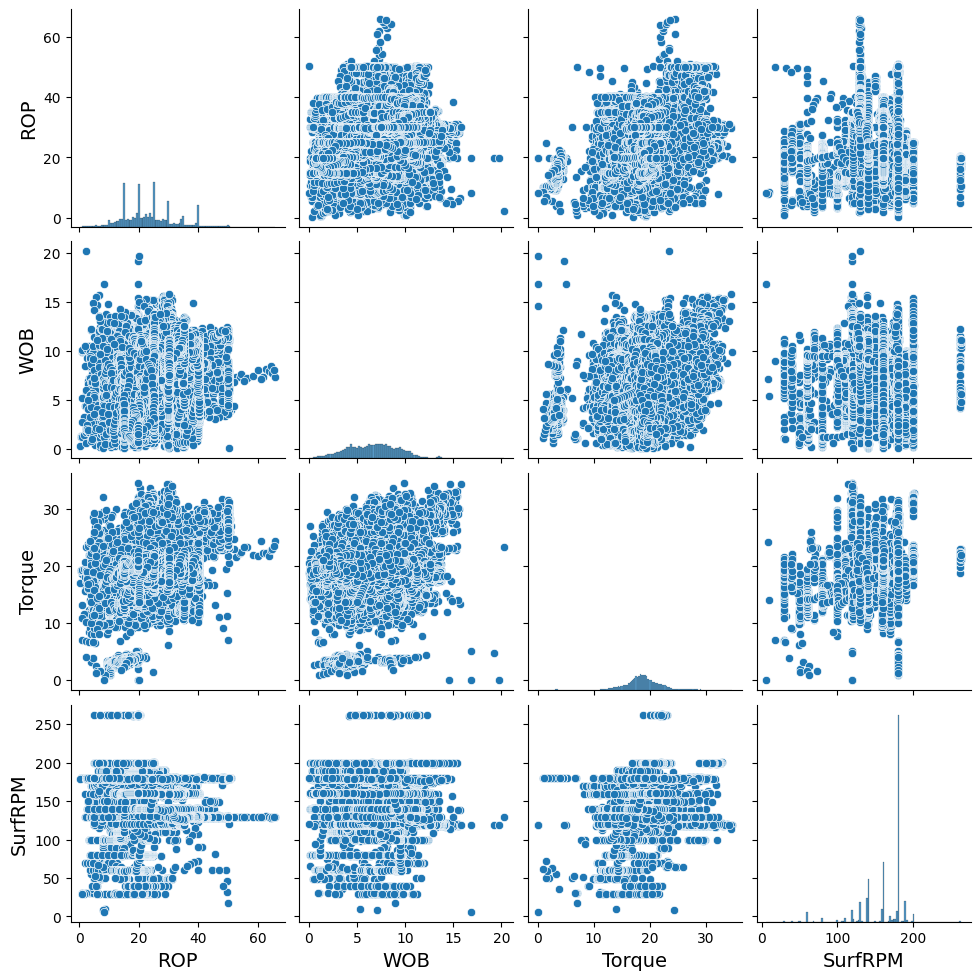

In [153]:
sns.pairplot(labelled_data_notWell1and4, vars = ['ROP','WOB','Torque','SurfRPM'])

In [154]:
data = labelled_data_notWell1and4 [(labelled_data_notWell1and4['Mudflow'] > 1400) & (labelled_data_notWell1and4['ROP'] < 50)
                                &  (labelled_data_notWell1and4['SurfRPM'] < 200)  & (labelled_data_notWell1and4['ECD'] < 1.62)
                                &  (labelled_data_notWell1and4['Torque'] > 6)     & (labelled_data_notWell1and4['Mudflow'] < 2600)].copy()

In [155]:
cleandata = data[['Well','ROP','WOB','Torque','SurfRPM', 'Mudflow', 'ECD', 'DownP', 'Facies']].copy()

In [156]:
cleandata = cleandata.rename(columns={'Facies': 'RockType'}) # Rename column

In [157]:
cleandata.describe()

,Well,ROP,WOB,Torque,SurfRPM,Mudflow,ECD,DownP,RockType
count,46788.000000,46788.000000,46788.000000,46788.000000,46788.000000,46788.000000,46788.000000,46788.000000,46788.000000
mean,7.630760,23.146215,6.690162,18.854980,161.303856,2245.624744,1.406701,391.191954,0.417351
std,2.549608,8.184475,2.643425,3.134183,28.913345,149.554367,0.060367,41.656821,0.662601
min,2.000000,0.337400,0.046100,6.690000,29.000000,1458.515300,1.308000,311.832300,0.000000
25%,6.000000,17.029250,4.684225,17.105000,140.229000,2197.108575,1.363400,359.303700,0.000000
50%,7.000000,22.571350,6.740950,18.703000,179.460000,2227.879650,1.384300,381.574400,0.000000
75%,10.000000,28.292525,8.560000,20.487000,180.054250,2367.359900,1.444400,424.889575,1.000000
max,12.000000,49.974600,20.217500,34.667000,199.977000,2515.209500,1.619600,506.351200,2.000000


Text(0.5, 1.0, 'Proportion of Each Rock Type')

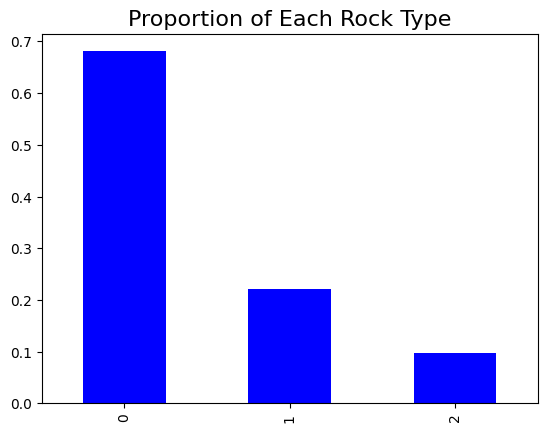

In [158]:
## Composition of each rock type type

Rock_Type = cleandata['RockType']
proportion = Rock_Type.value_counts() / Rock_Type.size
proportion.plot(kind = 'bar', color = 'blue')
plt.title('Proportion of Each Rock Type', fontsize = 16)

In [159]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Split data into training and testing sets
train_mask = cleandata['Well'] <= 11
test_mask = cleandata['Well'] == 12

training_data= cleandata[train_mask]
test_data= cleandata[test_mask]


x= training_data[['ROP','WOB','Torque','SurfRPM', 'Mudflow', 'ECD', 'DownP']]
y= training_data[['RockType']]

# split training set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [160]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
# Fit the data into the classifier

svm_clf = clf = SVC(C = 1, kernel = 'rbf', gamma = 'scale')
svm_clf.fit(X_train_scaled, y_train)

SVC(C=1)

In [162]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix  
y_svm_pred=svm_clf.predict(X_test_scaled)

print ('Accuracy Score : ', accuracy_score(y_test, y_svm_pred) )
print ('Report : ')
print (classification_report(y_test, y_svm_pred))

Accuracy Score :  0.9300208116545265
Report : 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5146
           1       0.87      0.88      0.88      1784
           2       0.95      0.78      0.86       758

    accuracy                           0.93      7688
   macro avg       0.92      0.88      0.90      7688
weighted avg       0.93      0.93      0.93      7688



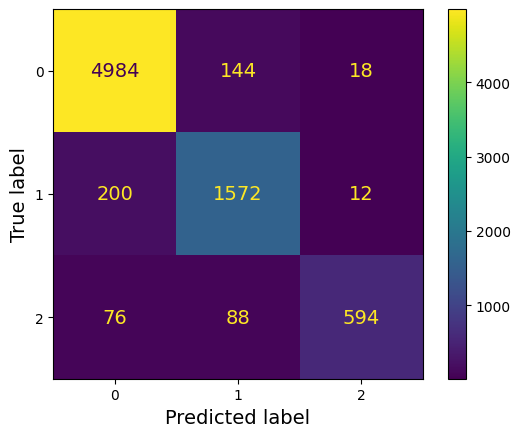

In [163]:
cm = confusion_matrix(y_test, y_svm_pred, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot()

### Hyperparameters tuning and cross validation

In [164]:
# Define the parameter grid
param_grid = {'C': [1, 5], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01]}
# Create a grid search object with the classifier and parameter grid
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='f1_micro',n_jobs=-1)
# Fit the grid search object to the training data
grid_search.fit(X_train_scaled, y_train)
# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

In [165]:
grid_search.best_params_

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}

In [166]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']].head()

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.794959,0.787480,0.786179,0.791596,0.004771,5
1,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.924553,0.919675,0.920976,0.922239,0.001839,2
2,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.794959,0.787480,0.786179,0.791596,0.004771,5
3,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.847967,0.840163,0.841626,0.845258,0.003666,4
4,"{'C': 5, 'gamma': 0.1, 'kernel': 'linear'}",0.794797,0.787480,0.786179,0.791531,0.004697,7


In [167]:
from sklearn.model_selection import cross_val_score
BestSVM = SVC(kernel = 'rbf')

scores = cross_val_score(BestSVM, X_train_scaled, y_train, scoring="f1_micro", cv=10)


Text(0.5, 1.0, 'F1 Scores obtained over 10-Fold Cross-validation \n using SVM Classification with an optimal set of parameters')

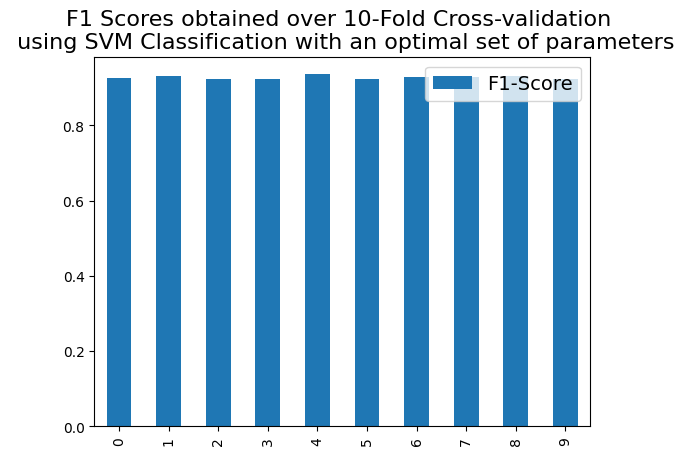

In [168]:
df_svm_F1 = pd.DataFrame(scores, columns = ['F1-Score'])
df_svm_F1.plot(kind = 'bar')
plt.title('F1 Scores obtained over 10-Fold Cross-validation \n using SVM Classification with an optimal set of parameters', fontsize = 16)

In [177]:
BestSVM.fit(X_train_scaled, y_train)

SVC()

In [174]:
# Predicting with well 12 data
x2= test_data[['ROP','WOB','Torque','SurfRPM', 'Mudflow', 'ECD', 'DownP']]
y2= test_data[['RockType']]

In [175]:
# Scale the data
scaler = StandardScaler()
X2_scaled = scaler.fit(x2)
X2_test_scaled = X2_scaled.transform(x2)

In [178]:
ypred= BestSVM.predict(X2_test_scaled)

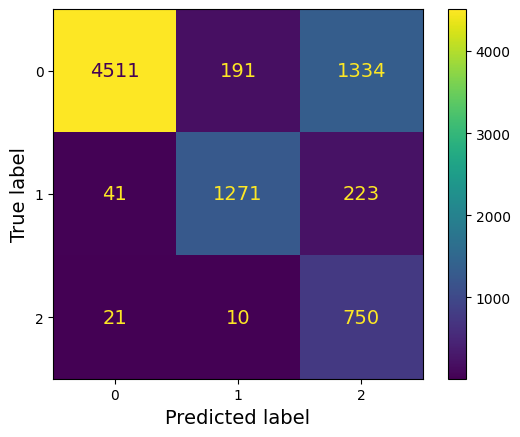

In [179]:
cm = confusion_matrix(y2, ypred, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot()

In [180]:
print ('Accuracy Score : ', accuracy_score(y2, ypred) )
print ('Report : ')
print (classification_report(y2, ypred))

Accuracy Score :  0.782088122605364
Report : 
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      6036
           1       0.86      0.83      0.85      1535
           2       0.33      0.96      0.49       781

    accuracy                           0.78      8352
   macro avg       0.72      0.85      0.73      8352
weighted avg       0.90      0.78      0.82      8352

